# Estimating Delivery Time

<span style="color:#555555;font-weight:500;font-size:15px">
Since the introduction of online shopping, has emerged as a vital aspect of today's market. Food businesses, in particular, heavily depend on efficient delivery services. Timely delivery is paramount for food items, ensuring they reach customers in their freshest state.
<br><br>
With that being said, our plan is to investigate whether we can enhance users' experience by providing the most accurate estimated delivery time for their food orders. This project aims to address this challenge through the utilization of machine learning and data mining techniques to predict the estimated delivery time.
</span>

In [1]:
# data analysis library
import pandas as pd

# visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# other
import numpy as np
import datetime

## Data Description

<span style="color:#555555;font-weight:500;font-size:15px">
The following dataset is from <a href="https://www.kaggle.com/datasets/gauravmalik26/food-delivery-dataset?select=train.csv">Kaggle</a>.
</span>  

In [2]:
# reading in the dataset file
df = pd.read_csv('data/food_delivery.csv')
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


**The Dataset consists of 20 columns and 45593 rows.**
   - ID, Delivery Person ID: ID unique to each delivery and person
<br>

**Some important variables to note!**
   - Weather Condition: 6 categorical description of weather (fog, stormy, cloudy, sandstorms, windy, sunny)
   - Road traffic density: describes traffic with Low, Medium, High, Jam
   - Type of Vehicle: motorcycle scooter electric scooter, bicycle
   - Vehicle Condition: ranges from 0 to 3 rating the condition
   - Type of Order: snack, meal, drinks, buffet
   - City: type of city (metropolitian, urban, semi-urban)

## Exploratory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant_latitude,45593.0,17.017729,8.185109,-30.905562,12.933284,18.546947,22.728163,30.914057
Restaurant_longitude,45593.0,70.231332,22.883647,-88.366217,73.170000,75.898497,78.044095,88.433452
Delivery_location_latitude,45593.0,17.465186,7.335122,0.010000,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45593.0,70.845702,21.118812,0.010000,73.280000,76.002574,78.107044,88.563452
Vehicle_condition,45593.0,1.023359,0.839065,0.000000,0.000000,1.000000,2.000000,3.000000


### Let's look at delivery people

In [5]:
# checking number of unique delivery person
print(f"{df['Delivery_person_ID'].nunique()} Delivery People")

1320 Delivery People


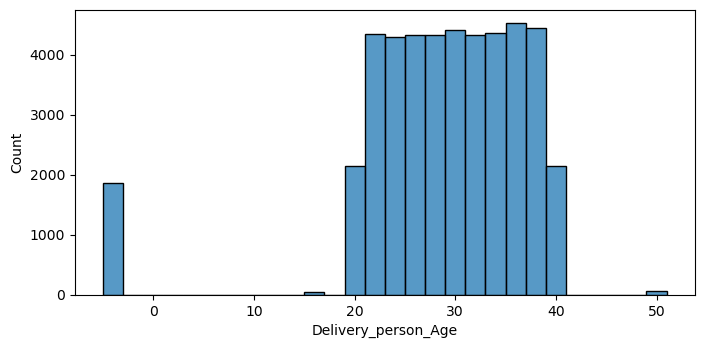

In [6]:
# lets look at the distrubution of age

fig, ax = plt.subplots(figsize=(8, 3.7))

sns.histplot(x = df['Delivery_person_Age'].apply(
    lambda x: -5 if x == 'NaN ' else int(x)), binwidth=2)

plt.show()

<span style="color:#555555;font-weight:500;font-size:15px">
We have a pretty evenly distrubuted age group, with 1854 missing values (about 4%).
</span>

## Data Cleaning

<span style="color:black;font-weight:700;font-size:15px">
1. Handling Missing Values
</span>

<span style="color:#555555;font-weight:500;font-size:15px">
The missing values on this dataset is marked with 'NaN ' instead of an actual NaN value.
</span>

In [7]:
# to remove leading & trailing whitespaces

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.strip()
        
df = df.replace("NaN", np.nan)

<span style="color:#555555;font-weight:500;font-size:15px">
Now we are able to see the number of missing values. Below are the percentage of missing values.
</span>

In [8]:
((df.isna().sum() / df.shape[0]) * 100).round(2)

ID                             0.00
Delivery_person_ID             0.00
Delivery_person_Age            4.07
Delivery_person_Ratings        4.18
Restaurant_latitude            0.00
Restaurant_longitude           0.00
Delivery_location_latitude     0.00
Delivery_location_longitude    0.00
Order_Date                     0.00
Time_Orderd                    3.80
Time_Order_picked              0.00
Weatherconditions              0.00
Road_traffic_density           1.32
Vehicle_condition              0.00
Type_of_order                  0.00
Type_of_vehicle                0.00
multiple_deliveries            2.18
Festival                       0.50
City                           2.63
Time_taken(min)                0.00
dtype: float64

<span style="color:#555555;font-weight:500;font-size:15px">

</span>

<span style="color:black;font-weight:700;font-size:15px">
2. Fixing Data Types
</span>

In [9]:
# change into datetime data type

df['Delivery_person_Age'] = df['Delivery_person_Age'].astype(float)
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype(float)
df['multiple_deliveries'] = df['multiple_deliveries'].astype(float)
df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True)

In [ ]:
df_train = df_train.sort_values(by=["order_pickup_time"]).reset_index(drop=True)

## Creating Features